# Deep Learning Model using CNN architecture with different layers

> Load Dataset from local system to google drive

> Then from google drive to google colab

In [ ]:
# Accessing Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Unzipping the data

In [ ]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/seg_train.zip" -d "/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/train_Set"

In [ ]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/seg_test.zip" -d "/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/test_Set"
!unzip -uq "/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/seg_pred.zip" -d "/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/pred_Set"

In [ ]:
!pip install -q keras
!pip install -q tensorflow

Importing the required libraries




In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator 
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from IPython.display import SVG
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Extracting the training set of images from google drive

In [ ]:
def get_images(directory):
    Images = []
    Labels = []
    
    for labels in os.listdir(directory):
        if labels == 'glacier': 
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+'/'+labels): 
            image = cv2.imread(directory+ '/'+labels+'/'+image_file) 
            image = cv2.resize(image,(150,150)) 
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1000) 

def get_category(x):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[x]


In [ ]:
Images,Labels = get_images('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/train_Set/seg_train/seg_train')
Images = np.array(Images)
Labels = np.array(Labels)

Visualization of categories of Images

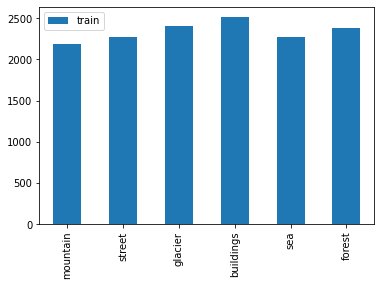

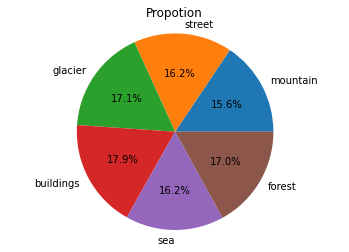

In [ ]:
category = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
_,count = np.unique(Labels, return_counts = True)
pd.DataFrame({"train": count}, index = category).plot.bar()
plt.show()

plt.pie(count,explode=(0, 0, 0, 0, 0, 0),labels = category,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Propotion")
plt.show()

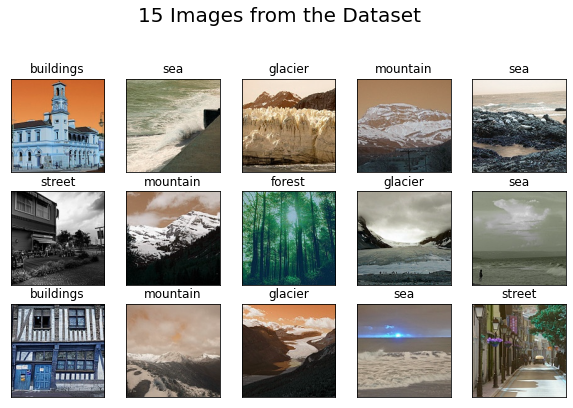

In [ ]:
 def display_image(image,label):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle('15 Images from the Dataset', fontsize = 20)
    for i in range(15):
        index = np.random.randint(Images.shape[0])
        plt.subplot(5,5,i+1)
        plt.imshow(image[index])
        plt.xticks([]) #Scale doesn't appear
        plt.yticks([]) #Scale doesn't apper
        plt.title(get_category(label[index]))
        plt.grid(False)
    plt.show()
 #Maximum 25 images can only be displayed.   
display_image(Images, Labels)


CNN with 3 layer


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
cnn3 = tf.keras.models.Sequential()

cnn3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[150,150,3]))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))
cnn3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))
cnn3.add(tf.keras.layers.Flatten())
cnn3.add(tf.keras.layers.Dense(units=200,activation='relu'))  
cnn3.add(tf.keras.layers.Dense(units=178,activation='relu'))
cnn3.add(tf.keras.layers.Dense(units=200,activation='relu'))
cnn3.add(tf.keras.layers.Dense(units=6,activation='softmax'))
cnn3.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [ ]:
trained = cnn3.fit(Images,Labels,epochs=30,validation_split=0.30)


Epoch 1/30
307/307 [==============================] - 18s 58ms/step - loss: 1.7135 - accuracy: 0.5637 - val_loss: 0.9647 - val_accuracy: 0.6436
Epoch 2/30
307/307 [==============================] - 17s 55ms/step - loss: 0.7526 - accuracy: 0.7250 - val_loss: 0.7852 - val_accuracy: 0.7091
Epoch 3/30
307/307 [==============================] - 17s 56ms/step - loss: 0.5966 - accuracy: 0.7835 - val_loss: 0.8817 - val_accuracy: 0.6891
Epoch 4/30
307/307 [==============================] - 17s 56ms/step - loss: 0.4752 - accuracy: 0.8304 - val_loss: 0.7490 - val_accuracy: 0.7352
Epoch 5/30
307/307 [==============================] - 17s 55ms/step - loss: 0.3909 - accuracy: 0.8597 - val_loss: 0.7050 - val_accuracy: 0.7585
Epoch 6/30
307/307 [==============================] - 17s 55ms/step - loss: 0.2987 - accuracy: 0.8954 - val_loss: 0.6748 - val_accuracy: 0.7777
Epoch 7/30
307/307 [==============================] - 17s 55ms/step - loss: 0.2235 - accuracy: 0.9233 - val_loss: 0.6999 - val_accuracy:

Saving the trained model (CNN-3layer )

In [ ]:
cnn3.save('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/cnn-3layer.h5')

In [ ]:
trained.save('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/cnn-3layerPro.h5')

loading the saved model (CNN-3layer)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/cnn-3layer.h5')

In [ ]:
new_model.summary()

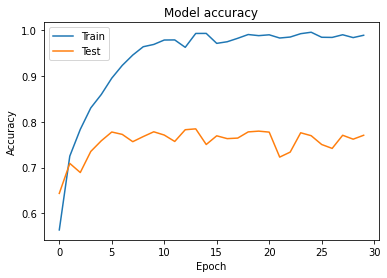

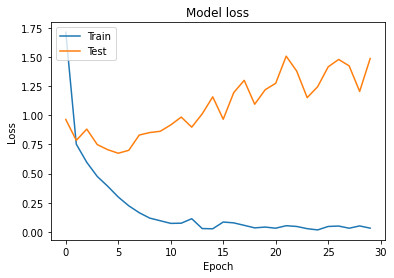

In [ ]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

RESOVLING OVERFITTING
using image augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale = 1/255, zoom_range = 0.3, horizontal_flip = True, rotation_range = 30)
train_generator = train_generator.flow(Images, Labels, batch_size = 64, shuffle = False)

In [ ]:
# not contain validation set
history = cnn3.fit_generator(train_generator, epochs = 30, shuffle = False)  

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
220/220 [==============================] - 75s 342ms/step - loss: 1.2621 - accuracy: 0.4994
Epoch 2/30
220/220 [==============================] - 74s 338ms/step - loss: 0.9964 - accuracy: 0.6179
Epoch 3/30
220/220 [==============================] - 75s 339ms/step - loss: 0.8998 - accuracy: 0.6618
Epoch 4/30
220/220 [==============================] - 74s 337ms/step - loss: 0.8396 - accuracy: 0.6917
Epoch 5/30
220/220 [==============================] - 74s 337ms/step - loss: 0.7963 - accuracy: 0.7073
Epoch 6/30
220/220 [==============================] - 73s 334ms/step - loss: 0.7632 - accuracy: 0.7180
Epoch 7/30
220/220 [==============================] - 80s 362ms/step - loss: 0.7362 - accuracy: 0.7300
Epoch 8/30
220/220 [==============================] - 81s 367ms/step - loss: 0.6954 - accuracy: 0.7470
Epoch 9/30
220/220 [==============================] - 80s 364ms/step - loss: 0.6803 - accuracy: 0.75

In [ ]:
# saving the improved model
cnn3.save('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/cnn-3layer_improved.h5')


In [ ]:
# loading the model
cnn3 = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/cnn-3layer_improved.h5')

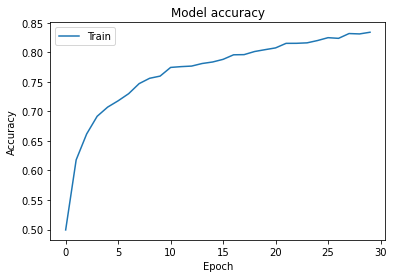

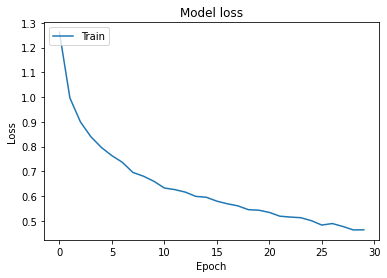

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

Extracting the test images from google drive

In [ ]:
test_Images,test_Labels = get_images('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/test_Set/seg_test/seg_test')
test_Images = np.array(test_Images)
test_Labels = np.array(test_Labels)

In [ ]:
test_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_generator.flow(test_Images, test_Labels, batch_size = 64, shuffle = False)

In [ ]:
evaluate = new_model.evaluate(test_Images, test_Labels, verbose = 1)
print( "Accuracy: "  + str(evaluate[1] * 100) + "%")


94/94 [==============================] - 1s 13ms/step - loss: 195.1899 - accuracy: 0.5870
Accuracy: 58.70000123977661%


In [ ]:
evaluate2 = new_model.evaluate_generator(test_generator, verbose = 1)
print("Accuracy:" + str(evaluate2[1] * 100) + "%")


Instructions for updating:
Please use Model.evaluate, which supports generators.
47/47 [==============================] - 2s 32ms/step - loss: 0.5147 - accuracy: 0.8213
Accuracy:82.13333487510681%


Extracting the prediction set of IMAGES from the google drive 

In [ ]:
def get_pred(directory):
    Images = []
    Labels = []
    label = 0
    
    for image_file in os.listdir(directory): 
        image = cv2.imread(directory+ '/' +image_file) 
        image = cv2.resize(image,(150,150)) 
        Images.append(image)
        Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1000) 
pred_Images,pred_Labels = get_pred("/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/pred_Set/seg_pred/seg_pred")
pred_Images = np.array(pred_Images)
print(pred_Images.shape)

(7301, 150, 150, 3)


In [ ]:
pred_generator = ImageDataGenerator(rescale = 1/255)
pred_generator = pred_generator.flow(pred_Images, batch_size = 64, shuffle = False)
prediction = new_model.predict_generator(pred_generator, verbose=1)
prediction.shape


In [ ]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

Prediction Visualization (On CNN-3layer)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


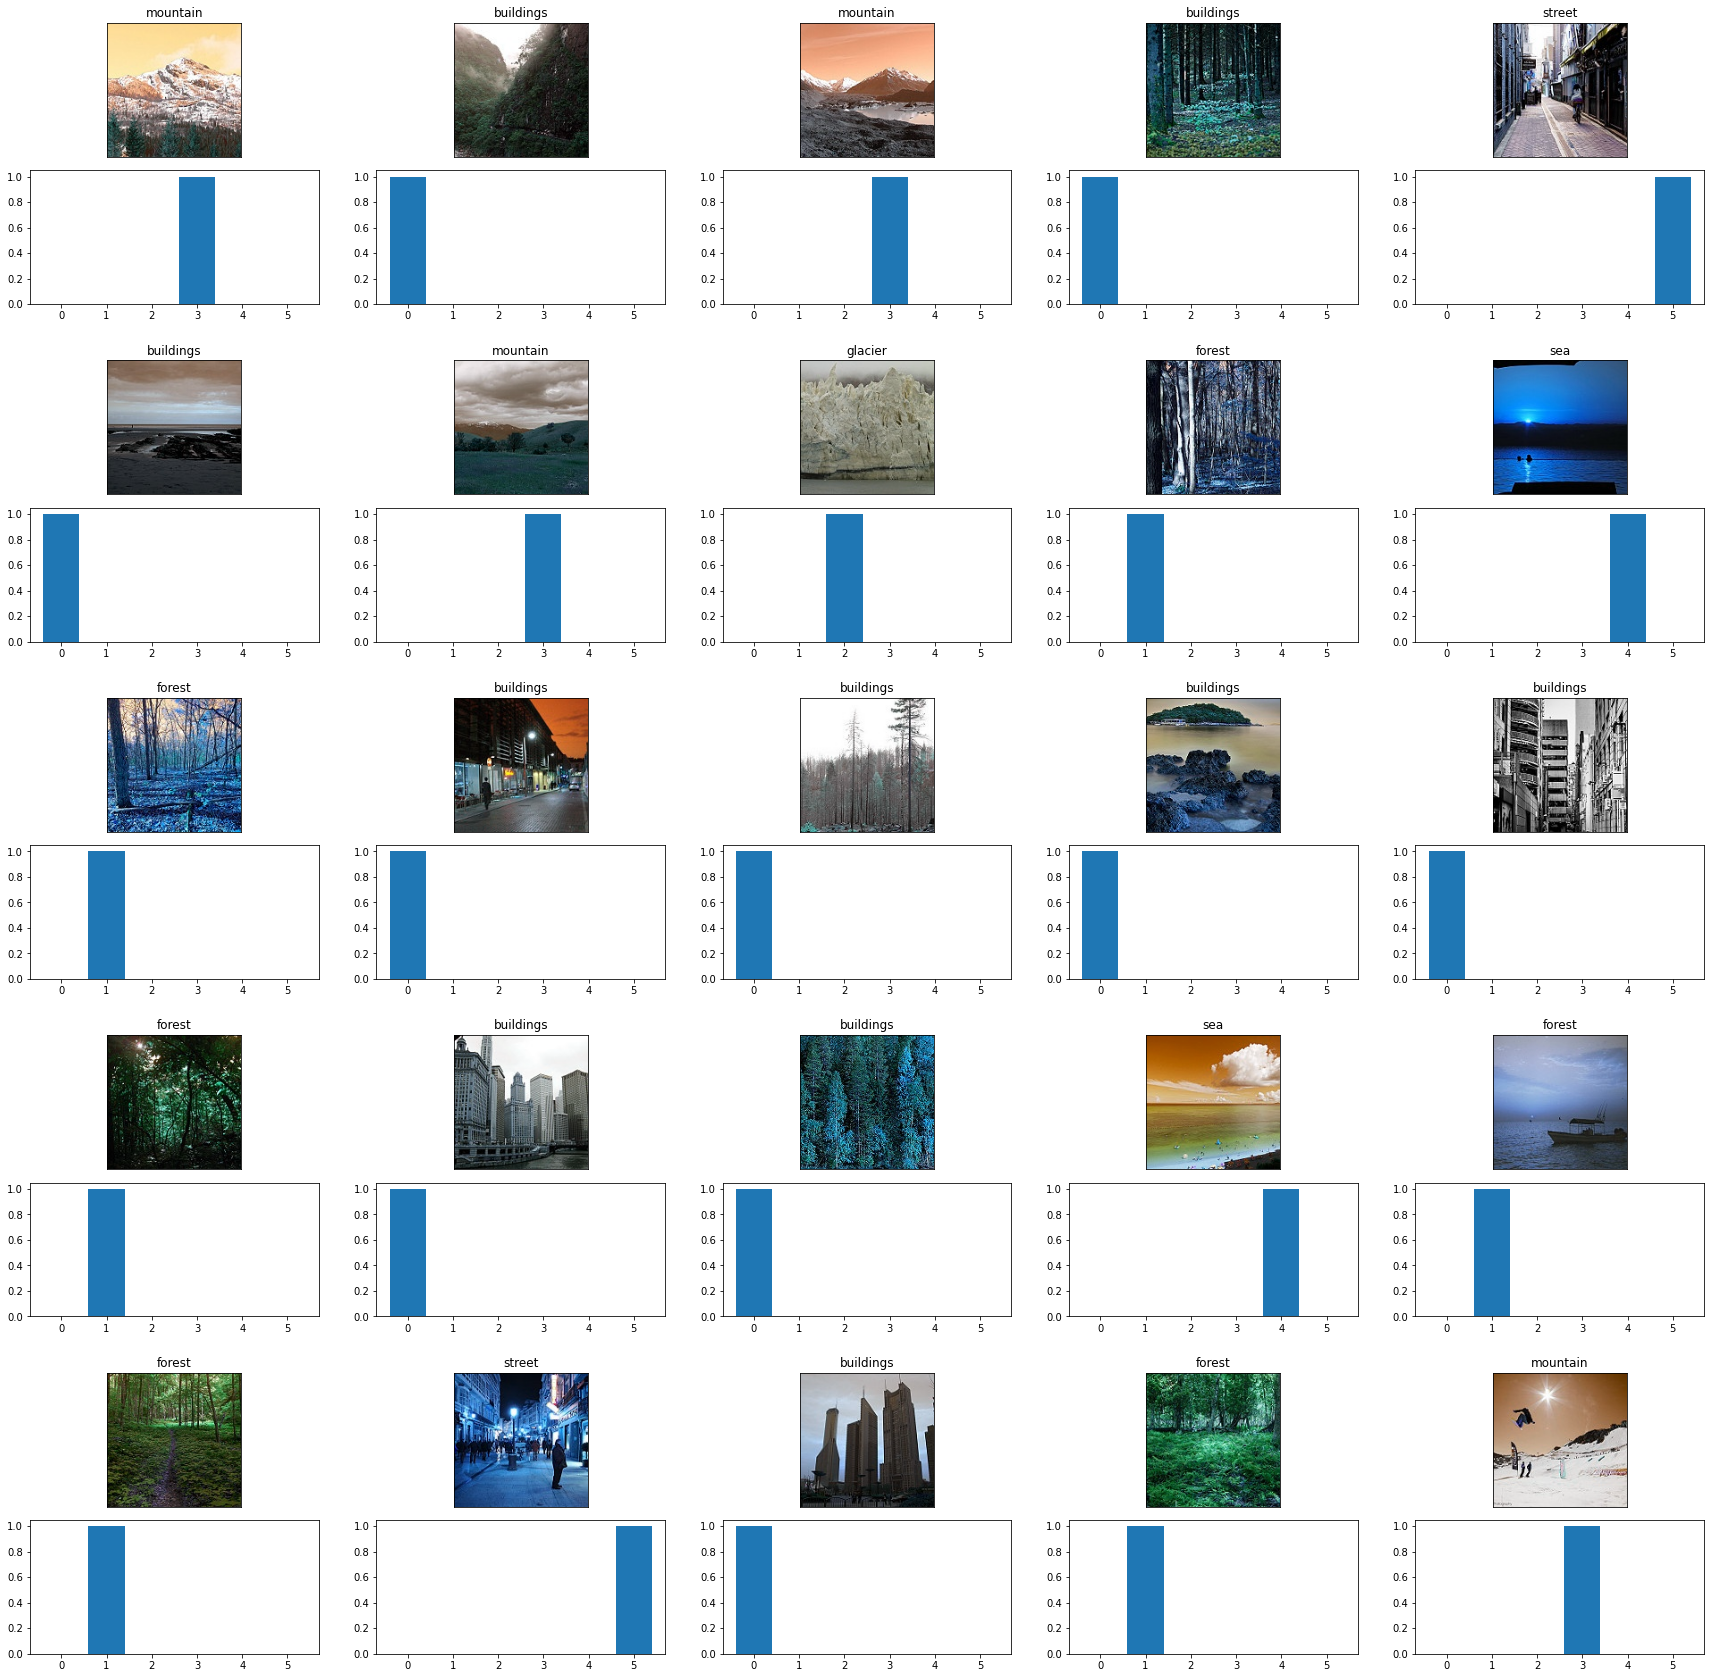

In [ ]:
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
from random import randint

fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_Images))
    pred_image = np.array([pred_Images[rnd_number]])
    pred_class = get_classlabel(new_model.predict_classes(pred_image)[0])
    pred_prob = new_model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

CNN with 4-layer

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
cnn4.add(MaxPooling2D((2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.4))

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.4))

cnn4.add(Flatten())

cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dropout(0.3))
cnn4.add(Dense(6, activation='softmax'))

cnn4.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn4.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)      

In [ ]:
trained1 = cnn4.fit(Images,Labels,epochs=30,validation_split=0.30)
cnn4.save('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/cnn-4layer.h5')

Epoch 1/30
307/307 [==============================] - 17s 55ms/step - loss: 3.1809 - accuracy: 0.1715 - val_loss: 1.7912 - val_accuracy: 0.1755
Epoch 2/30
307/307 [==============================] - 16s 52ms/step - loss: 1.7914 - accuracy: 0.1810 - val_loss: 1.7914 - val_accuracy: 0.1755
Epoch 3/30
307/307 [==============================] - 16s 52ms/step - loss: 1.7910 - accuracy: 0.1822 - val_loss: 1.7913 - val_accuracy: 0.1757
Epoch 4/30
307/307 [==============================] - 16s 52ms/step - loss: 1.7909 - accuracy: 0.1838 - val_loss: 1.7911 - val_accuracy: 0.1688
Epoch 5/30
307/307 [==============================] - 16s 52ms/step - loss: 1.7909 - accuracy: 0.1838 - val_loss: 1.7909 - val_accuracy: 0.1786
Epoch 6/30
307/307 [==============================] - 16s 52ms/step - loss: 1.7839 - accuracy: 0.2064 - val_loss: 1.7471 - val_accuracy: 0.2688
Epoch 7/30
307/307 [==============================] - 16s 52ms/step - loss: 1.7577 - accuracy: 0.2144 - val_loss: 1.7950 - val_accuracy:

FailedPreconditionError: ignored

In [ ]:
cnn4 = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Natural Scene Classification/cnn-4layer.h5')

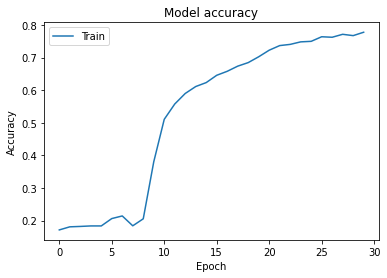

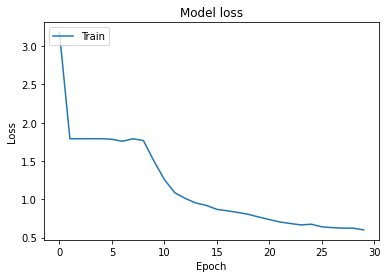

In [ ]:
plt.plot(trained1.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(trained1.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()